Importing the data

In [1]:
import pandas as pd
import numpy as np

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.set_index('row_id', inplace=True)
test.set_index('row_id', inplace=True)

print(train.head())

                       time  x  y direction  congestion
row_id                                                 
0       1991-04-01 00:00:00  0  0        EB          70
1       1991-04-01 00:00:00  0  0        NB          49
2       1991-04-01 00:00:00  0  0        SB          24
3       1991-04-01 00:00:00  0  1        EB          18
4       1991-04-01 00:00:00  0  1        NB          60


Exploring the data

In [2]:
print(train.describe())
print(train.info())

                   x              y     congestion
count  848835.000000  848835.000000  848835.000000
mean        1.138462       1.630769      47.815305
std         0.801478       1.089379      16.799392
min         0.000000       0.000000       0.000000
25%         0.000000       1.000000      35.000000
50%         1.000000       2.000000      47.000000
75%         2.000000       3.000000      60.000000
max         2.000000       3.000000     100.000000
<class 'pandas.core.frame.DataFrame'>
Int64Index: 848835 entries, 0 to 848834
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time        848835 non-null  object
 1   x           848835 non-null  int64 
 2   y           848835 non-null  int64 
 3   direction   848835 non-null  object
 4   congestion  848835 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 38.9+ MB
None


In [3]:
print(train['direction'].value_counts())

EB    156708
NB    156708
SB    156708
WB    143649
NE     91413
SW     91413
NW     26118
SE     26118
Name: direction, dtype: int64


Still need to use function to make better code

In [4]:
import datetime as dt
from myfunctions import convert_date

for df in [train, test]:
    convert_date(df, 'time')

groupedbyhour = train.groupby('hour').congestion.mean()
print(groupedbyhour)

hour
0     43.323245
1     42.979291
2     43.993375
3     43.410407
4     42.082446
5     42.350803
6     43.816343
7     47.118348
8     48.428191
9     47.179440
10    47.121179
11    48.533455
12    50.141617
13    51.197644
14    52.179932
15    53.310379
16    53.775232
17    54.044604
18    51.962528
19    50.210927
20    49.803896
21    48.872393
22    47.073316
23    44.880417
Name: congestion, dtype: float64


Visualizing some columns to see if any trends exist

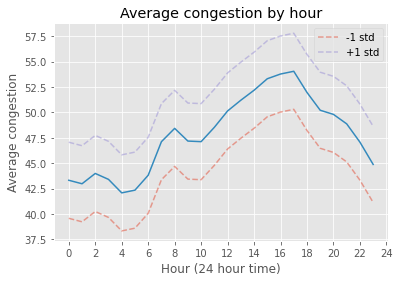

In [5]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')

plt.title('Average congestion by hour')
plt.xlabel('Hour (24 hour time)')
plt.ylabel('Average congestion')

plt.plot(groupedbyhour.index, groupedbyhour.values - np.std(groupedbyhour.values)\
    , alpha=0.5, label='-1 std', linestyle='--')
plt.plot(groupedbyhour.index, groupedbyhour.values)
plt.plot(groupedbyhour.index, groupedbyhour.values + np.std(groupedbyhour.values)\
    , alpha=0.5, label='+1 std', linestyle='--')

plt.xticks(np.arange(0, len(groupedbyhour) + 1, step=2))

plt.legend()
plt.show()

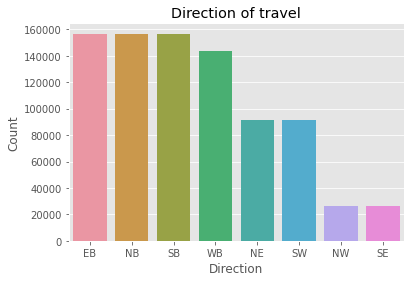

In [6]:
import seaborn as sns

fig, ax = plt.subplots()

sns.countplot(data=train, x='direction', ax=ax)

ax.set(xlabel='Direction', ylabel='Count', title='Direction of travel')

plt.show()

In [7]:
train.head()

,time,x,y,direction,congestion,month,weekday,day,hour,minute
row_id,,,,,,,,,,
0,1991-04-01,0,0,EB,70,4,0,1,0,0
1,1991-04-01,0,0,NB,49,4,0,1,0,0
2,1991-04-01,0,0,SB,24,4,0,1,0,0
3,1991-04-01,0,1,EB,18,4,0,1,0,0
4,1991-04-01,0,1,NB,60,4,0,1,0,0


In [8]:
train = pd.get_dummies(train, columns=['direction'], drop_first=True)
test = pd.get_dummies(test, columns=['direction'], drop_first=True)

print(train.head())

             time  x  y  ...  direction_SE  direction_SW  direction_WB
row_id                   ...                                          
0      1991-04-01  0  0  ...             0             0             0
1      1991-04-01  0  0  ...             0             0             0
2      1991-04-01  0  0  ...             0             0             0
3      1991-04-01  0  1  ...             0             0             0
4      1991-04-01  0  1  ...             0             0             0

[5 rows x 16 columns]


In [9]:
# print(train['time'].dt.month.value_counts(sort=True))

In [10]:
# print(train['time'].dt.day.value_counts(sort=True))

In [11]:
print(train['time'].dt.year.value_counts(sort=True))

1991    848835
Name: time, dtype: int64


In [12]:
print(train['time'].dt.weekday.value_counts(sort=True))

0    124020
6    121680
4    121290
1    121225
2    121095
5    119925
3    119600
Name: time, dtype: int64


In [13]:
print(train.head())

             time  x  y  ...  direction_SE  direction_SW  direction_WB
row_id                   ...                                          
0      1991-04-01  0  0  ...             0             0             0
1      1991-04-01  0  0  ...             0             0             0
2      1991-04-01  0  0  ...             0             0             0
3      1991-04-01  0  1  ...             0             0             0
4      1991-04-01  0  1  ...             0             0             0

[5 rows x 16 columns]


In [14]:
train_x = train.drop(['time', 'congestion'], axis=1)
train_y = train['congestion']

print(train_x.head())

        x  y  month  ...  direction_SE  direction_SW  direction_WB
row_id               ...                                          
0       0  0      4  ...             0             0             0
1       0  0      4  ...             0             0             0
2       0  0      4  ...             0             0             0
3       0  1      4  ...             0             0             0
4       0  1      4  ...             0             0             0

[5 rows x 14 columns]


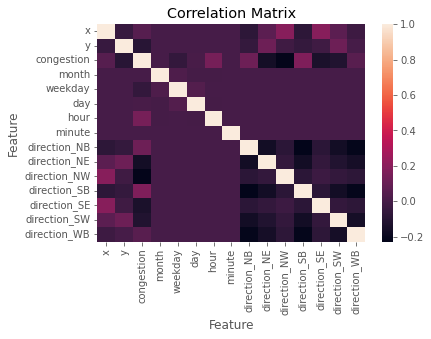

In [15]:
fig, ax = plt.subplots()

sns.heatmap(train.corr(), ax=ax)
ax.set(xlabel='Feature', ylabel='Feature', title='Correlation Matrix')

plt.show()

In [16]:
from sklearn.ensemble import RandomForestRegressor as rfr

rand_forest = rfr(random_state=42)

rand_forest.fit(train_x, train_y)

RandomForestRegressor(random_state=42)

In [17]:
def mape(pred, actual):
    error = np.abs((pred - actual)) / actual * 100
    error.replace(np.inf, np.nan, inplace=True)
    error.dropna(inplace=True)
    return error.mean()

In [18]:
mape(rand_forest.predict(train_x), train_y)

5.649965845727438

In [19]:
# test.drop("time", axis=1, inplace=True)
submission = pd.DataFrame({'row_id': test.index, 'congestion': rand_forest.predict(test)}).to_csv('submission.csv', index=False)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- time
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[int64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>)